In [216]:
%load_ext autoreload
%autoreload 2
import torch
cat = torch.distributions.Categorical(torch.tensor([1/2,1/2]))
mvn = torch.distributions.MultivariateNormal(torch.tensor([[-2.], [2.]]), torch.eye(1).unsqueeze(0).repeat(2,1,1))
q_distribution = torch.distributions.MixtureSameFamily(cat, mvn)
q_samples = q_distribution.sample([5000])
import matplotlib.pyplot as plt 
cat = torch.distributions.Categorical(torch.tensor([1/3,1/3,1/3]))
mvn = torch.distributions.MultivariateNormal(torch.tensor([[0],[4.], [-4]]), torch.eye(1).unsqueeze(0).repeat(3,1,1))
p_distribution = torch.distributions.MixtureSameFamily(cat, mvn)
p_samples = p_distribution.sample([5000])
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [217]:
from density_estimators import * 

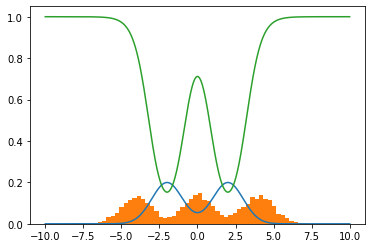

In [218]:
tt = torch.linspace(-10,10, 1000)
plt.plot(tt, torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))
plt.hist(p_samples.numpy(), density = True, bins = 50)
plt.plot(tt, torch.exp(p_distribution.log_prob(tt.unsqueeze(-1)) - torch.log(torch.exp(p_distribution.log_prob(tt.unsqueeze(-1))) + torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))))
plt.show()

In [219]:
log_alpha = lambda samples : q_distribution.log_prob(samples) - torch.log(torch.exp(p_phi.log_prob(samples)) + torch.exp(q_distribution.log_prob(samples)))

In [220]:
dif = DIFDensityEstimator(p_samples, 10)
optim = torch.optim.Adam(list(dif.parameters()),lr = 5e-3)
tt = torch.linspace(-10,10, 200)
pbar = tqdm(range(1000))
for t in pbar:
    optim.zero_grad()
    loss = -torch.sum(dif.log_prob(p_samples) - torch.log(torch.exp(dif.log_prob(p_samples)) + torch.exp(q_distribution.log_prob(p_samples))))
    loss.backward()
    optim.step()
    '''clear_output(wait= True)
    plt.plot(tt, torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))
    plt.hist(p_samples.numpy(), density = True, bins = 50)
    plt.plot(tt.numpy(), torch.exp(dif.log_prob(tt.unsqueeze(-1)) - torch.log(torch.exp(dif.log_prob(tt.unsqueeze(-1))) + torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))).detach().numpy())
    plt.plot(tt, torch.exp(p_distribution.log_prob(tt.unsqueeze(-1)) - torch.log(torch.exp(p_distribution.log_prob(tt.unsqueeze(-1))) + torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))))

    plt.show()'''
    pbar.set_postfix_str(str(loss.item()))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.20it/s, 2267.29345703125]


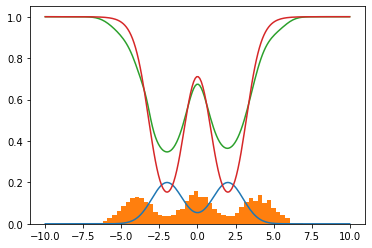

In [192]:
clear_output(wait= True)
plt.plot(tt, torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))
plt.hist(p_samples.numpy(), density = True, bins = 50)
plt.plot(tt.numpy(), torch.exp(dif.log_prob(tt.unsqueeze(-1)) - torch.log(torch.exp(dif.log_prob(tt.unsqueeze(-1))) + torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))).detach().numpy())
plt.plot(tt, torch.exp(p_distribution.log_prob(tt.unsqueeze(-1)) - torch.log(torch.exp(p_distribution.log_prob(tt.unsqueeze(-1))) + torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))))

plt.show()

In [143]:
import math
class circle():
    def __init__(self,mean, noise):
        super().__init__()
        self.mean = mean
        self.noise = noise

    def sample(self,num_samples):
        angle = torch.rand(num_samples)*2*math.pi
        x,y = self.mean*torch.cos(angle) + torch.randn_like(angle)*self.noise,self.mean*torch.sin(angle) + torch.randn_like(angle)*self.noise
        return torch.cat([x.unsqueeze(-1),y.unsqueeze(-1)], dim =-1)

    def log_prob(self,samples):
        r = torch.norm(samples, dim=-1).unsqueeze(-1)
        mvn = torch.distributions.MultivariateNormal(self.mean.unsqueeze(-1), torch.eye(1)*self.noise)
        return mvn.log_prob(r)



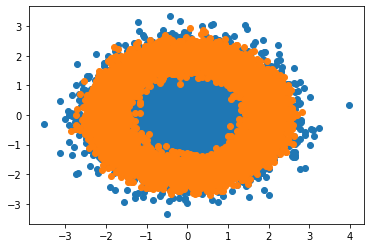

In [159]:
target_1 = circle(mean = torch.tensor([1.]), noise = 0.725)
samples_1 = target_1.sample([10000])
target_2 = circle(mean = torch.tensor([2.]), noise = 0.25)
samples_2 = target_2.sample([10000])
plt.scatter(samples_1[:,0].numpy(), samples_1[:,1].numpy())
plt.scatter(samples_2[:,0].numpy(), samples_2[:,1].numpy())

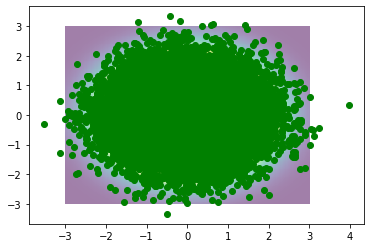

In [160]:
from utils import * 
plt.figure()
plot_2d_function(lambda samples : torch.exp(target_2.log_prob(samples)), x_min = -3, x_max = 3 , y_min = -3, y_max= 3, delta = 200, new_figure= False, alpha = .5)
plt.scatter(samples_1[:,0].numpy(), samples_1[:,1].numpy(), color = 'green')
plt.show()

In [150]:
dif = DIFDensityEstimator(samples_1, 50)
optim = torch.optim.Adam(list(dif.parameters()),lr = 5e-3)
tt = torch.linspace(-10,10, 200)
pbar = tqdm(range(1000))
for t in pbar:
    optim.zero_grad()
    loss = -torch.sum(dif.log_prob(samples_1) - torch.log(torch.exp(dif.log_prob(samples_1)) + torch.exp(target_2.log_prob(samples_1))))
    loss.backward()
    optim.step()
    clear_output(wait= True)
    if t%100==0:
        plot_2d_function(lambda samples : torch.exp(dif.log_prob(samples) - torch.log(torch.exp(dif.log_prob(samples)) + torch.exp(target_2.log_prob(samples)))), x_min = -3, x_max = 3 , y_min = -3, y_max= 3, delta = 200, new_figure= False, alpha = .5)
        plt.show()
    pbar.set_postfix_str(str(loss.item()))

  1%|█▊                                                                                                                             | 14/1000 [00:03<03:42,  4.43it/s, 1644.4925537109375]


KeyboardInterrupt: 

In [ ]:
plot_2d_function(lambda samples : torch.exp(dif.log_prob(samples) - torch.log(torch.exp(dif.log_prob(samples)) + torch.exp(target_2.log_prob(samples)))), x_min = -3, x_max = 3 , y_min = -3, y_max= 3, delta = 200, new_figure= False, alpha = .5)
plt.show()

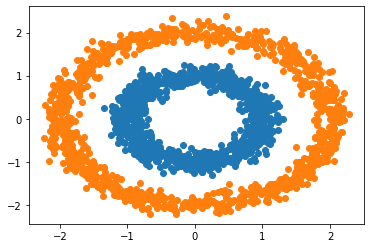

In [74]:
target_1 = Inner_circle()
samples_1 = target_1.sample([1000])
target_2 = Outer_circle()
samples_2 = target_2.sample([1000])
plt.scatter(samples_1[:,0].numpy(), samples_1[:,1].numpy())
plt.scatter(samples_2[:,0].numpy(), samples_2[:,1].numpy())

In [85]:
hidden_dims = [32,32,32]
network_dimensions = [samples_1.shape[-1]] + hidden_dims + [1]
network = []
for h0, h1 in zip(network_dimensions, network_dimensions[1:]):
    network.extend([nn.Linear(h0, h1), nn.SiLU(), ])
network.pop()
log_r = nn.Sequential(*network)

print(log_r(samples_1).shape)

torch.Size([1000, 1])


In [86]:
optim = torch.optim.Adam(list(log_r.parameters()),lr = 5e-3)
tt = torch.linspace(-10,10, 200)
pbar = tqdm(range(1000))
for t in pbar:
    optim.zero_grad()
    loss = -torch.sum(log_r(samples_1).squeeze(-1) - torch.log(torch.exp(log_r(samples_1).squeeze(-1)) + torch.exp(target_2.log_prob(samples_1))))
    loss.backward()
    optim.step()
    clear_output(wait= True)
    if t%100==0:
        plot_2d_function(lambda samples : torch.exp(log_r(samples).squeeze(-1) - torch.log(torch.exp(log_r(samples).squeeze(-1)) + torch.exp(target_2.log_prob(samples)))), x_min = -3, x_max = 3 , y_min = -3, y_max= 3, delta = 20, new_figure= False, alpha = .5)
        plt.show()
    pbar.set_postfix_str(str(loss.item()))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.57it/s, 9.5367431640625e-07]


In [212]:
from torch import nn
class Classif_from_density(nn.Module):
    def __init__(self, label_1_samples, label_0_log_prob, hidden_dims = [128,128,128]):
        super().__init__()
        self.label_1_samples = label_1_samples
        self.p = label_1_samples.shape[-1]
        self.label_0_log_prob = label_0_log_prob
        network_dimensions = [self.p] + hidden_dims + [1]
        network = []
        for h0, h1 in zip(network_dimensions, network_dimensions[1:]):
            network.extend([nn.Linear(h0, h1), nn.SiLU(), ])
        network.pop()
        self.log_r = nn.Sequential(*network)
    
    def log_alpha(self,samples):
        #compute log value of p_theta(k=1|x)
        return torch.log(1- torch.exp(self.label_0_log_prob(samples) - torch.log(torch.exp(self.log_r(samples).squeeze(-1))+torch.exp(self.label_0_log_prob(samples)))))
    
    def loss(self,samples):
        return -torch.sum(self.log_alpha(samples))
    
    def train(self,epochs, lr = 5e-4):
        optim = torch.optim.Adam(self.parameters(), lr)
        pbar = tqdm(range(epochs))
        for t in pbar:
            optim.zero_grad()
            loss = self.loss(self.label_1_samples)
            loss.backward()
            optim.step()
            pbar.set_postfix_str('loss = ' + str(loss.item()))

In [213]:
classif = Classif_from_density(p_samples,q_distribution.log_prob)
classif.train(10000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [06:49<00:00, 24.41it/s, loss = -0.0]


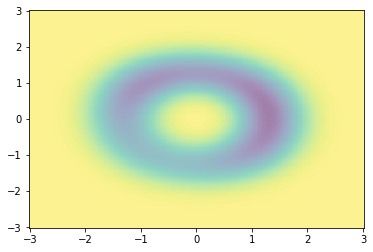

In [169]:
plot_2d_function(lambda samples:classif.log_alpha(samples), x_min = -3, x_max = 3 , y_min = -3, y_max= 3, delta = 200, new_figure= False, alpha = .5)
plt.show()

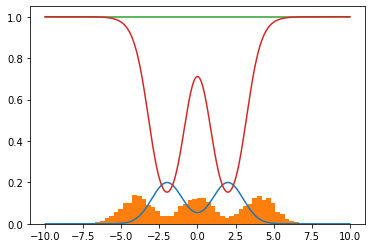

In [215]:
clear_output(wait= True)
plt.plot(tt, torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))
plt.hist(p_samples.numpy(), density = True, bins = 50)
plt.plot(tt.numpy(), torch.exp(classif.log_alpha(tt.unsqueeze(-1))).detach().numpy())
plt.plot(tt, torch.exp(p_distribution.log_prob(tt.unsqueeze(-1)) - torch.log(torch.exp(p_distribution.log_prob(tt.unsqueeze(-1))) + torch.exp(q_distribution.log_prob(tt.unsqueeze(-1))))))

plt.show()

In [211]:
print(classif.log_alpha(tt.unsqueeze(-1)))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 